In [22]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math

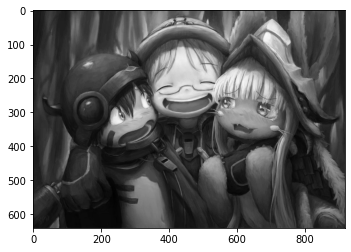

In [23]:
# import gambar dan convert ke grayscale
image = plt.imread('img/gambar.jpg')
gbr = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(gbr, 'gray')

In [24]:
# membuat zero padding
padding = np.pad(gbr,[1],'constant')
padding[0: gbr.shape[0]+2, 0: gbr.shape[1]+2]

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 45, 35, ..., 36, 35,  0],
       [ 0, 41, 31, ..., 32, 32,  0],
       ...,
       [ 0, 28, 19, ..., 31, 30,  0],
       [ 0, 31, 22, ..., 36, 36,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [25]:
# inisialisasi kernel Sobel
Sx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Sy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# SOBEL AND PREWITT

In [26]:
def SobelorPrewitt (image, padding, Kernelx, Kernely): # inisialisasi fungsi SobelorPrewitt dengan parameter image, padding, Kernelx, Kernely.
    Gx = Gy = sum = np.zeros([image.shape[0], image.shape[1]]) # inisialisasi varibel Gx, Gy, sum yang bernilai matrix bernilai 0 dengan ukuran dari parameter image.
    kernel = np.zeros([3, 3]) # inisialisasi kernel yang berisi matrix bernilai 0 dengan ukuran 3x3
    for first in range (2): # perulangan dengan variabel first dengan batasan <2
        if first==0: # kondisi jika first bernilai 0
            kernel = Kernelx # nilai kernel berisi nilai dari parameter Kernelx
        else: # kondisi lainya
            kernel = Kernely # nilai kernel berisi nilai dari parameter Kernely
        
        for i in range (1, padding.shape[0]-1): # perulangan dengan variabel i dimualai dari 1 dan dibatasi dengan nilai vertikal citra dari parameter image - 1 
            for j in range (1, padding.shape[1]-1): # # perulangan dengan variabel j dimualai dari 1 dan dibatasi dengan nilai horizontal citra dari parameter image - 1 
                # melakukan perkalian antara pixel padding dan kernel
                x = padding[i-1, j-1]*kernel[0, 0] + padding[i-1, j]*kernel [0, 1] + padding[i-1, j+1]*kernel[0, 2] 
                y = padding[i, j-1]*kernel[1, 0] + padding[i, j]*kernel [1, 1] + padding[i, j+1]*kernel[1, 2]
                z = padding[i+1, j-1]*kernel[2, 0] + padding[i+1, j]*kernel [2, 1] + padding[i+1, j+1]*kernel[2, 2]
                if first==0: # kondisi jika first bernilai 0
                    Gx[i-1, j-1] = x+y+z # Gx pada indek ke i, j berisi penjumalahan antara x, y, z
                else: # kondisi lainya
                    Gy[i-1, j-1] = x+y+z # Gy pada indek ke i, j berisi penjumalahan antara x, y, z
        
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                hasil = round(math.sqrt((Gx[i, j]**2)+(Gy[i, j]**2))) # hasil akar dari Gx kuadrat + Gy kuadrat
                sum[i, j] =  hasil # hasil dimasukan ke dalam pixel sum
    
    return sum



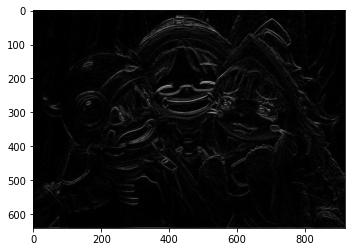

In [27]:
withSobel = SobelorPrewitt(gbr, padding, Sx, Sy) # memanggil fungsi dengan beserta parametr dan kernel dari jendela Sobel
plt.imshow(withSobel, 'gray') # menampilkan dengan color mapping gray

In [28]:
# inisialisasi jendela prewit
Px = np.array([[-1, 0 ,1], [-1, 0 ,1], [-1, 0 ,1]])
Py = np.array([[1, 1 ,1], [0, 0 ,0], [-1, -1, -1]])


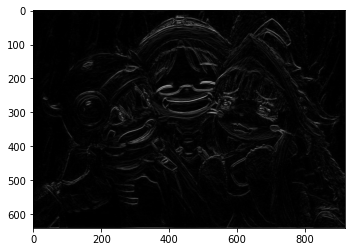

In [29]:
withPrewitt = SobelorPrewitt(gbr, padding, Px, Py) # memanggil fungsi dengan beserta parametr dan kernel dari jendela Prewitt
plt.imshow(withPrewitt, 'gray') # menampilkan dengan color mapping gray

# Robert 

In [30]:
# inisialisasi jendela Robert
Rx = np.array([
    [1, 0],
    [0, -1]
])
Ry = np.array([
    [0, 1],
    [-1, 0]
])

In [31]:
def Robert (image, padding, sx, sy): # inisialisasi fungsi Robert dengan parameter image, padding, Kernelx, Kernely.
    Gx = Gy = sum = np.zeros([image.shape[0], image.shape[1]]) # inisialisasi varibel Gx, Gy, sum yang bernilai matrix bernilai 0 dengan ukuran dari parameter image.
    kernel = np.zeros([3, 3]) # inisialisasi kernel yang berisi matrix bernilai 0 dengan ukuran 3x3

    for first in range (2): # perulangan dengan variabel first dengan batasan <2
        if first==0: # kondisi jika first bernilai 0
            kernel = sx # nilai kernel berisi nilai dari parameter Kernelx
        else: # kondisi lainya
            kernel = sy # nilai kernel berisi nilai dari parameter Kernely
        
        for i in range (1, padding.shape[0]-1): # perulangan dengan variabel i dimualai dari 1 dan dibatasi dengan nilai vertikal citra dari parameter image - 1
            for j in range (1, padding.shape[1]-1): # perulangan dengan variabel i dimualai dari 1 dan dibatasi dengan nilai horinzontal citra dari parameter image - 1
                # melakukan perkalian antara pixel padding dan kernel
                x = padding[i-1, j-1]*kernel[0, 0] + padding[i-1, j]*kernel [0, 1] 
                y = padding[i, j-1]*kernel[1, 0] + padding[i, j]*kernel [1, 1] 
                if first==0:
                    Gx[i-1, j-1] = x+y # Gx pada indek ke i, j berisi penjumalahan antara x, y
                else:
                    Gy[i-1, j-1] = x+y # Gy pada indek ke i, j berisi penjumalahan antara x, y
        
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                hasil = round(math.sqrt((Gx[i, j]**2)+(Gy[i, j]**2))) # hasil akar dari Gx kuadrat + Gy kuadrat
                sum[i, j] =  hasil # hasil dimasukan ke dalam pixel sum

    return sum



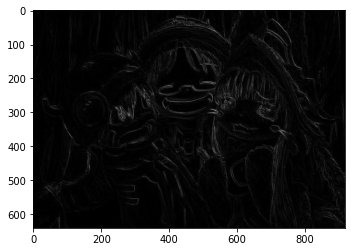

In [32]:
withRobert = Robert(gbr, padding, Rx, Ry)
plt.imshow(withRobert, 'gray')

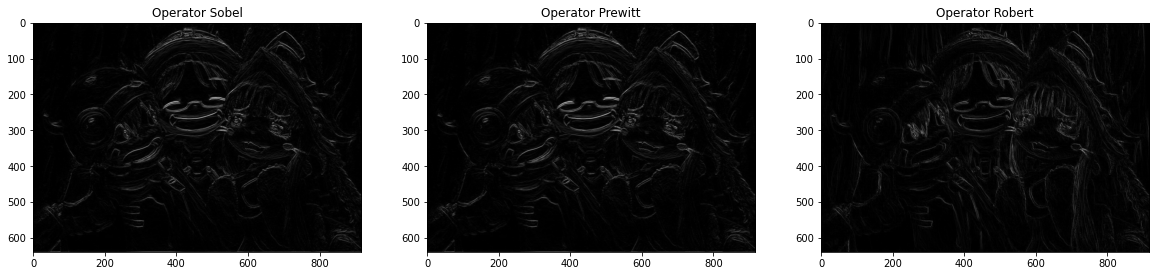

In [33]:
plt.figure(facecolor='white', figsize=[20, 15])
plt.subplot(131)
plt.title('Operator Sobel')
plt.imshow(withSobel, 'gray')
plt.subplot(132)
plt.title('Operator Prewitt')
plt.imshow(withPrewitt, 'gray')
plt.subplot(133)
plt.title('Operator Robert')
plt.imshow(withRobert, 'gray')

# PERBANDINGAN OPERATOR

In [34]:
def calculatewhite(image):
    sum = 0

    for i in range (image.shape[0]):
        for j in range (image.shape[1]):
            if image[i, j] != 0:
                sum += 1

    return sum

whiteSobel = calculatewhite(withSobel)
whitePrewitt = calculatewhite(withPrewitt)
whiteRobert = calculatewhite(withRobert)


In [35]:
if whiteSobel>whitePrewitt and whiteSobel>whiteRobert:
    print("Operator Sobel saja")
elif whitePrewitt>whiteSobel and whitePrewitt>whiteRobert:
    print("Operator Prewitt saja")
elif whiteRobert>whiteSobel and whiteRobert>whitePrewitt:
    print("Operator Robert saja")

Operator Sobel saja


Perbedaan dari proses deteksi tepi menggunakan ketiga operator (Sobel, Prewitt, dan Robert) terletak pada kernelnya. Meskipun memiliki proses pengerjaan yang sama, perbedaan kernel ini akan menghasilkan luaran citra yang berbeda. Pada hasil Operator Sobel, tepi dapat terlihat jelas karena fungsi dari operasi ini sangat sensitif terhadap tepian diagonal daripada horizontal dan vertikal (namun tetap ada). Kemudian pada hasil Operator Prewitt, fungsi akan sangat sensitif terhadap tepi horizontal dan vertikal daripada tepi diagonalnya (namun tetap ada). Hal ini diakibatkan dari terdapatnya pengurangan pada elemen tengah matriks kernel. Yang terakhir yaitu hasil dari Operator Robert. Hasil dari operator ini kurang nampak tepian dari sisi horizontal dan vertikal karena kernel dari Operator Robert hanya menekankan pada pemeriksaan kedua arah diagonal. Meskipun demikian, objek dideteksi akan terdeteksi lebih baik pada sisi-sisi miringnya.